# K-Means Clustering

## Importar librerias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importar el dataset

In [98]:
dataset = pd.read_csv('https://raw.githubusercontent.com/PilarHidalgo/Clustering_Hackaton-UP/master/Mall_Customers.csv')
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Dividir los data set por sexo

In [31]:
dataset_V=dataset[dataset['Genre']=='Male']
dataset_M=dataset[dataset['Genre']=='Female']

In [102]:
X_V=dataset_V.iloc[:, [3,4]].values # Nota solo tomar los datos numericos
X_M=dataset_M.iloc[:, [3,4]].values # puede ser tambien edad: [2,3,4]

## Usando el método del codo para hallar el número de K (clústers)

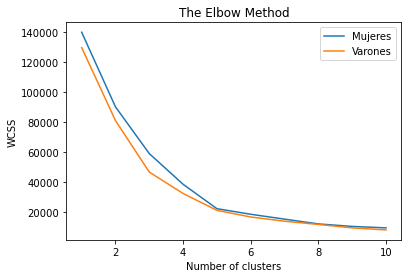

In [104]:
from sklearn.cluster import KMeans
wcss_V= []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_V)
    wcss_V.append(kmeans.inertia_)
wcss_M = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_M)
    wcss_M.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss_M, label='Mujeres')   
plt.plot(range(1, 11), wcss_V, label='Varones')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.show()

###### De acuerdo al gráfico, las mujeres tiene 5grupos mientras que los varones estan agrupados en 3 partes

## Entrenando el modelo K-Means

In [110]:
kmeansM = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans_M = kmeansM.fit_predict(X_M)

kmeansV = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans_V = kmeansV.fit_predict(X_V)

## Visualizando los clusters clusters

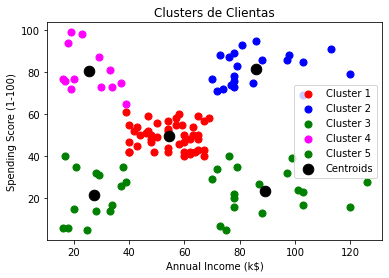

In [111]:
#Mujeres
plt.scatter(X_M[y_kmeans_M == 0, 0], X_M[y_kmeans_M== 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X_M[y_kmeans_M == 1, 0], X_M[y_kmeans_M == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X_M[y_kmeans_M == 2, 0], X_M[y_kmeans_M == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(X_M[y_kmeans_M == 3, 0], X_M[y_kmeans_M == 3, 1], s = 50, c = 'magenta', label = 'Cluster 4')
plt.scatter(X_M[y_kmeans_M == 4, 0], X_M[y_kmeans_M == 4, 1], s = 50, c = 'green', label = 'Cluster 5')
plt.scatter(kmeansM.cluster_centers_[:, 0], kmeansM.cluster_centers_[:, 1], s = 112, c = 'black', label = 'Centroids')
plt.title('Clusters de Clientas')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

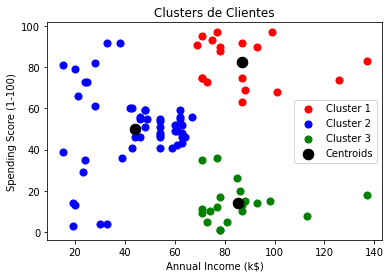

In [112]:
plt.scatter(X_V[y_kmeans_V == 0, 0], X_V[y_kmeans_V== 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X_V[y_kmeans_V == 1, 0], X_V[y_kmeans_V == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X_V[y_kmeans_V == 2, 0], X_V[y_kmeans_V == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
#plt.scatter(X_V[y_kmeans_V == 3, 0], X_V[y_kmeans_V == 3, 1], s = 50, c = 'magenta', label = 'Cluster 4')
plt.scatter(kmeansV.cluster_centers_[:, 0], kmeansV.cluster_centers_[:, 1], s = 112, c = 'black', label = 'Centroids')
plt.title('Clusters de Clientes')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [113]:
centroids_V = kmeansV.cluster_centers_
centroids_V

array([[87.11111111, 82.66666667],
       [44.1       , 50.        ],
       [85.15      , 14.05      ]])

La conclusión para el grupo de varones: 
    Cluster 1: gana mucho y gasta mucho (igual), 
    Cluster 2: gana regular y gasta más (solo uh poco mas), 
    Cluster 3: gana mucho y gasta poco

In [115]:
centroids_M = kmeansM.cluster_centers_
centroids_M

array([[54.54347826, 49.52173913],
       [86.04761905, 81.66666667],
       [89.05555556, 23.72222222],
       [25.69230769, 80.53846154],
       [27.35714286, 21.71428571]])

La conclusión para las mujeres: 
    Cluster 1: gana regular y gastas regular,
    Cluster 2: gana mucho y gastas mucho,
    Cluster 3: gana mucho y gastas poco,
    Cluster 4: gana poco y gastas mucho, 
    Cluster 5: gana poco y gasta poco (casi todo).

### Referencias:
- Machine learning A_Z course, Hands on Python
- Hartigan, J. A.; Wong, M. A. (1979). «Algorithm AS 136: A k-medias Clustering Algorithm». Journal of the Royal Statistical Society, Series C (Applied Statistics) 28 (1): 100–108. JSTOR 2346830.

